In [1]:
!pip install gymnasium

In [2]:
import gymnasium as gym
# استيراد مكتبة الحالات
from gymnasium import spaces
# مكتبة نمباي للتعامل مع المصفوفات
import numpy as np
# مكتبة الرسم
import matplotlib.pyplot as plt

In [3]:
# بيئة عالم الشبكة المخصصة
class CustomGridEnv(gym.Env):
    # باني الصنف المخصص
    def __init__(self, n_rows=5, n_cols=5, goal_state=None, render_mode="human"):
        # استدعاء باني الصنف الأساسي
        super().__init__()

        # عدد الصفوف والأعمدة
        self.n_rows = n_rows
        self.n_cols = n_cols
        # عدد الحالات بناءً على الصفوف والأعمدة
        self.n_states = n_rows * n_cols
        # 4 حركات: لأعلى، لأسفل، لليسار، لليمين
        self.n_actions = 4
        self.rendering_mode=render_mode
        # فضاء الحالات والأفعال
        self.observation_space = spaces.Discrete(self.n_states)  # الحالات
        # الأفعال : 0 - لأعلى، 1 - لأسفل، 2 - لليسار، 3 - لليمين
        self.action_space = spaces.Discrete(self.n_actions)


        # حالة الهدف (افتراضيًا هي الزاوية السفلى اليمنى)
        if goal_state is None:
            self.goal_state = self.n_states - 1  # تحديد حالة الهدف في الزاوية السفلى اليمنى
        else:
            self.goal_state = goal_state  # إذا تم تمرير حالة هدف محددة، نستخدمها

        self.state = 0  # الحالة الابتدائية (الزاوية العليا اليسرى)


    def reset(self, seed=None, return_info=False, options=None):
        # إعادة ضبط البيئة إلى الحالة الأولية (الزاوية العليا اليسرى)
        self.state = 0
        return self.state, {}
        # تنفيذ الفعل
    def step(self, action):
        # الحصول على الصف والعمود بناءً على الحالة الحالية
        row, col = divmod(self.state, self.n_cols)

        # تنفيذ الأفعال  (أعلى، أسفل، لليسار، لليمين)
        if action == 0:  # لأعلى
            row -= 1
        elif action == 1:  # لأسفل
            row += 1
        elif action == 2:  # لليسار
            col -= 1
        elif action == 3:  # لليمين
            col += 1

        # التأكد من بقاء الوكيل داخل حدود الشبكة
        row = max(0, min(row, self.n_rows - 1))
        col = max(0, min(col, self.n_cols - 1))

        # تحديد الحالة الجديدة بناءً على الصف والعمود
        self.state = row * self.n_cols + col

        # منطق المكافآت: -1 لكل خطوة، 100 عند الوصول إلى الهدف
        if self.state == self.goal_state:
            reward = 100
            terminated = True
        else:
            reward = -1
            terminated = False

        return self.state, reward, terminated, False, {}
    def render(self ):
      # استخدام مكتبة الرسم
      if self.rendering_mode == "human":
          # إنشاء الرسم البياني
          fig, ax = plt.subplots(figsize=(4, 4))
          ax.set_xticks(np.arange(self.n_cols + 1) - 0.5, minor=True)
          ax.set_yticks(np.arange(self.n_rows + 1) - 0.5, minor=True)
          ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

          # تعبئة الشبكة بالحالة الحالية والهدف
          for i in range(self.n_rows):
              for j in range(self.n_cols):
                  state = i * self.n_cols + j
                  if state == self.state:
                      ax.text(j, i, 'A', ha='center', va='center', fontsize=12, color='black')  # موضع الوكيل
                  elif state == self.goal_state:
                      ax.text(j, i, 'G', ha='center', va='center', fontsize=12, color='blue')  # حالة الهدف
                  else:
                      ax.text(j, i, str(state), ha='center', va='center', fontsize=12, color='black')
          # قلب المحور العمودي ليتناسب مع إحداثيات الشبكة
          plt.gca().invert_yaxis()
          plt.show()
      else: # ainsi render
          # عرض الشبكة كنص
          grid = np.full((self.n_rows, self.n_cols), ' ', dtype=str)
          grid[self.goal_state // self.n_cols, self.goal_state % self.n_cols] = 'G'  # الهدف
          grid[self.state // self.n_cols, self.state % self.n_cols] = 'A'  # الوكيل

          for row in range(self.n_rows):
              print("+" + "----" * self.n_cols + "+")
              row_str = "|"
              for col in range(self.n_cols):
                  row_str += f" {grid[row, col]} |"
              print(row_str)
          print("+" + "----" * self.n_cols + "+")

In [4]:
# تسجيل البيئة المخصصة
gym.register(
    id="CustomGrid-v0", # معرّف البيئة المخصصة
    entry_point=CustomGridEnv, # نقطة البداية للبيئة
    max_episode_steps=4 # عدد دورات الحلقة
)

In [5]:
# إنشاء البيئة
env = gym.make("CustomGrid-v0", n_rows=5, n_cols=5)

In [6]:
# دالة مخصصة لاسم الفعل
def get_action_name(action_number):
    if action_number == 0:
        return "Up"
    elif action_number == 1:
        return "Down"
    elif action_number == 2:
        return "Left"
    elif action_number == 3:
        return "Right"
    else:
        return "Unknown"

0
Initial State: 0


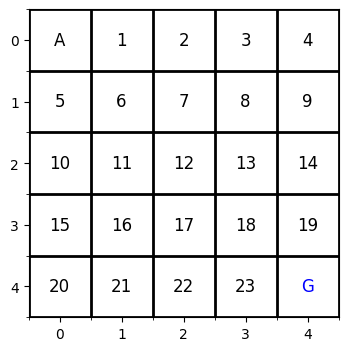

In [7]:
# إعادة ضبط البيئة
state,_ = env.reset()
i=0
print(i)
print(f"Initial State: {state}")
env.render()

step: 0, action: Down, next_state: 5, reward: -1


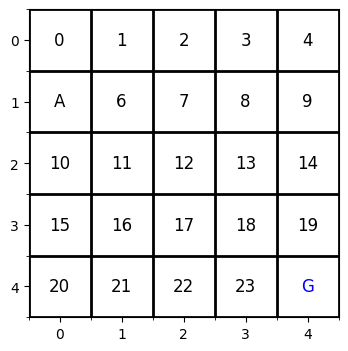

step: 1, action: Left, next_state: 5, reward: -1


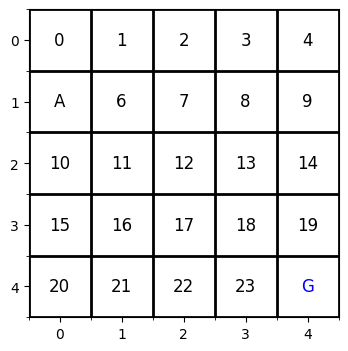

step: 2, action: Down, next_state: 10, reward: -1


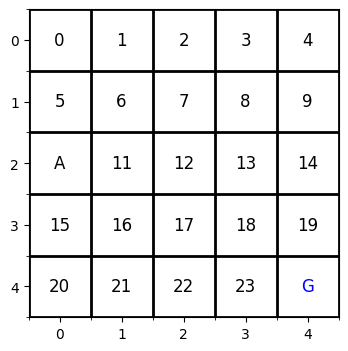

step: 3, action: Right, next_state: 11, reward: -1


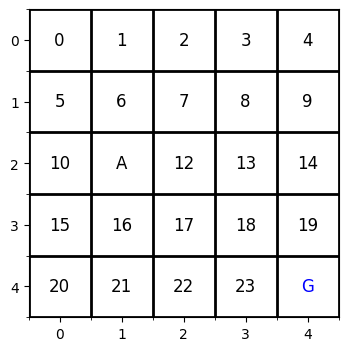

In [8]:
terminated=False # الوصول للهدف
truncated=False # انتهاء دورات الحلقة
# إجراء حلقة للتفاعل مع البيئة
while not (terminated or truncated):
     # اختيار فعل عشوائي
    action = env.action_space.sample()
     # تنفيذ الفعل في البيئة
    next_state, reward, terminated, truncated, info = env.step(action)
    # عرض البيئة بعد كل خطوة
    print(f"step: {i}, action: {get_action_name(action)}, next_state: {next_state}, reward: {reward}")
    env.render()
    i=i+1
# إغلاق البيئة بعد الانتهاء
env.close()

In [9]:
# إنشاء البيئة مع وضع العرض
env = gym.make("CustomGrid-v0", n_rows=5, n_cols=5, render_mode="ansi")
# إعادة ضبط البيئة
state,_ = env.reset()
i=0
print(i)
print(f"Initial State: {state}")
terminated=False # الوصول للهدف
truncated=False # انتهاء دورات الحلقة
# إجراء حلقة للتفاعل مع البيئة
while not (terminated or truncated):
     # اختيار فعل عشوائي
    action = env.action_space.sample()
     # تنفيذ الفعل في البيئة
    next_state, reward, terminated, truncated, info = env.step(action)
    # عرض البيئة بعد كل خطوة
    print(f"step: {i}, action: {get_action_name(action)}, next_state: {next_state}, reward: {reward}")
    env.render()
    i=i+1
# إغلاق البيئة بعد الانتهاء
env.close()

0
Initial State: 0
step: 0, action: Down, next_state: 5, reward: -1
+--------------------+
|   |   |   |   |   |
+--------------------+
| A |   |   |   |   |
+--------------------+
|   |   |   |   |   |
+--------------------+
|   |   |   |   |   |
+--------------------+
|   |   |   |   | G |
+--------------------+
step: 1, action: Down, next_state: 10, reward: -1
+--------------------+
|   |   |   |   |   |
+--------------------+
|   |   |   |   |   |
+--------------------+
| A |   |   |   |   |
+--------------------+
|   |   |   |   |   |
+--------------------+
|   |   |   |   | G |
+--------------------+
step: 2, action: Right, next_state: 11, reward: -1
+--------------------+
|   |   |   |   |   |
+--------------------+
|   |   |   |   |   |
+--------------------+
|   | A |   |   |   |
+--------------------+
|   |   |   |   |   |
+--------------------+
|   |   |   |   | G |
+--------------------+
step: 3, action: Down, next_state: 16, reward: -1
+--------------------+
|   |   |   | 

/usr/local/lib/python3.11/dist-packages/gymnasium/envs/registration.py:736: UserWarning: WARN: The environment is being initialised with render_mode='ansi' that is not in the possible render_modes ([]).
  logger.warn(
